In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import  datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
rnd_state = 3927

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
pca_transformed = PCA(n_components=2).fit_transform(data.iloc[:, :4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


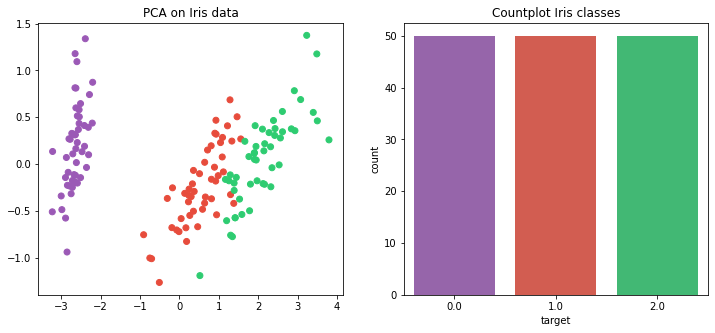

In [6]:
colors=["#9b59b6", "#e74c3c", "#2ecc71"]
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", data.target)))
plt.title('PCA on Iris data')

plt.subplot(122)
sns.countplot(data.target, palette=sns.color_palette(colors))
plt.title('Countplot Iris classes');

In [7]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(data.iloc[:, :4], data.target, test_size = .3, random_state = rnd_state)

In [8]:
classifier = KMeans(n_clusters=3).fit(predictors_train)
prediction = classifier.predict(predictors_test)

In [9]:
pca_transformed = PCA(n_components=2).fit_transform(predictors_test)

In [10]:
prediction = np.where(prediction==1, 3, prediction)
prediction = np.where(prediction==2, 1, prediction)
prediction = np.where(prediction==3, 2, prediction)

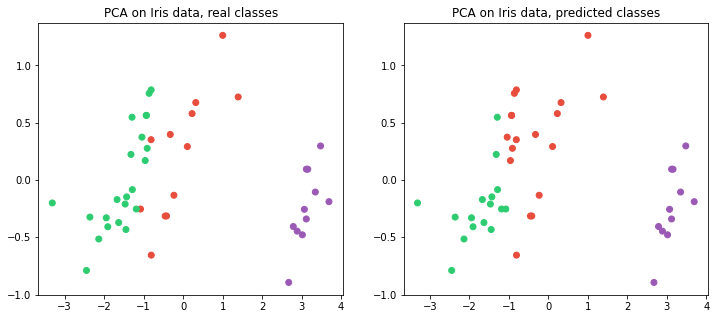

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", target_test)))
plt.title('PCA on Iris data, real classes');

plt.subplot(122)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", prediction)))
plt.title('PCA on Iris data, predicted classes');

In [12]:
clust_df = predictors_train.reset_index(level=[0])
clust_df.drop('index', axis=1, inplace=True)
clust_df['cluster'] = classifier.labels_

In [13]:
clust_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.7,2.8,4.5,1.3,2
1,5.6,2.7,4.2,1.3,2
2,7.1,3.0,5.9,2.1,1
3,6.5,3.0,5.8,2.2,1
4,5.9,3.0,4.2,1.5,2


In [14]:
print ('Clustering variable means by cluster')
clust_df.groupby('cluster').mean()

Clustering variable means by cluster


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,4.989744,3.438462,1.469231,0.248718
1,6.886364,3.090909,5.854545,2.077273
2,5.859091,2.790909,4.343182,1.415909


In [15]:
print('Confusion matrix:\n', pd.crosstab(target_test, prediction, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(target_test, prediction))

Confusion matrix:
 Actual      0   1   2  All
Predicted                 
0.0        11   0   0   11
1.0         0  11   1   12
2.0         0   7  15   22
All        11  18  16   45

Accuracy:  0.8222222222222222
